In [1]:
!pip install deeprenewal
!pip install 'rpy2>=2.9.*,<3.*'
!R -e 'install.packages(c("forecast", "nnfor"), repos="https://cloud.r-project.org")'

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [219 lines of output]
  setup.py:460: UserWarning: Unrecognized setuptools command ('dist_info --egg-base C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\pip-modern-metadata-28kj67s_'), proceeding with generating Cython sources and expanding templates
    warnings.warn("Unrecognized setuptools command ('{}'), proceeding with "
  Running from SciPy source directory.
  lapack_opt_info:
  lapack_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\ProgramData\\Anaconda3\\envs\\SeriesTiempoInter\\lib', 'C:\\', 'C:\\ProgramData\\Anaconda3\\envs\\SeriesTiempoInter\\libs', 'C:\\ProgramData\\Anaconda3\\Library\\lib']
    NOT AVAILABLE
  
  openblas_lapack_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  cust


  Using cached deeprenewal-0.3.3.tar.gz (75 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pip-19.2.3-py2.py3-none-any.whl (1.4 MB)
  Using cached bump2version-0.5.11-py2.py3-none-any.whl (23 kB)
  Using cached wheel-0.33.6-py2.py3-none-any.whl (21 kB)
  Using cached watchdog-0.9.0.tar.gz (85 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached flake8-3.7.8-py2.py3-none-any.whl (70 kB)
  Using cached tox-3.14.0-py2.py3-none-any.whl (80 kB)
  Using cached coverage-4.5.4.tar.gz (385 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached mkdocs_material-6.0.2-py2.py3-none-any.whl (3.9 MB)
  Using cached mkdocstrings-0.13.6-py3-none-any.whl (36 kB)
  Using cached twine-1.14.0-py2.py3-none-any.whl (35 kB)
  Using cached pytest-4.6.5-py2.py3-none-any.whl (230 kB)
  Using cached pytest_r

  customize MSVCCompiler
    libraries lapack_atlas not found in C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries f77blas,cblas,atlas not found in C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries lapack_atlas not found in C:\
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries f77blas,cblas,atlas not found in C:\
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries lapack_atlas not found in C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\libs
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    librari

In [3]:
import random
import os
import numpy as np
#import mxnet as mx

def seed_everything():
    random.seed(42)
    np.random.seed(42)
    #mx.random.seed(42)
    
seed_everything()

from deeprenewal import get_dataset
from gluonts.dataset.util import to_pandas
from deeprenewal import DeepRenewalEstimator
from deeprenewal import CrostonForecastPredictor
from deeprenewal import IntermittentEvaluator
from gluonts.model.deepar import DeepAREstimator
from gluonts.distribution.neg_binomial import NegativeBinomialOutput
from gluonts.distribution.piecewise_linear import PiecewiseLinearOutput
from gluonts.distribution.student_t import StudentTOutput
from gluonts.model.r_forecast import RForecastPredictor
from gluonts.model.prophet import ProphetPredictor
from gluonts.model.npts import NPTSPredictor
from gluonts.evaluation import Evaluator
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions 
#import mxnet as mx
import ast
from tqdm import tqdm
from argparse import ArgumentParser
from gluonts.model.forecast import SampleForecast
from gluonts.model.predictor import Predictor
import pandas as pd
import joblib
import plotly.express as px
from pathlib import Path
pd.set_option('display.max_columns', 500)

ModuleNotFoundError: No module named 'deeprenewal'

In [8]:
from gluonts.mx.distribution.neg_binomial import NegativeBinomialOutput

ModuleNotFoundError: No module named 'mxnet'

# Config

In [3]:
parser = ArgumentParser()
parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")

# add PROGRAM level args
parser.add_argument('--use-cuda', type=bool, default=True)
parser.add_argument('--log-gradients', type=bool, default=True)
parser.add_argument('--datasource', type=str, default="retail_dataset")
parser.add_argument('--model-save-dir', type=str, default="saved_models")

# Trainer specific args
parser.add_argument('--batch_size', type=int, default=32)
parser.add_argument('--learning-rate', type=float, default=1e-2)
parser.add_argument('--max-epochs', type=int, default=10)
parser.add_argument('--number-of-batches-per-epoch', type=int, default=100)
parser.add_argument('--clip-gradient', type=float, default=5.170127652392614)
parser.add_argument('--weight-decay', type=float, default=0.01)


# Model specific args
parser.add_argument('--context-length-multiplier', type=int, default=2)
parser.add_argument('--num-layers', type=int, default=2)
parser.add_argument('--num-cells', type=int, default=64)
parser.add_argument('--cell-type', type=str, default="lstm")
#p% are dropped and set to zero
parser.add_argument('--dropout-rate', type=float, default=0.3)
parser.add_argument('--use-feat-dynamic-real', type=bool, default=False)
parser.add_argument('--use-feat-static-cat', type=bool, default=False)
parser.add_argument('--use-feat-static-real', type=bool, default=False)
parser.add_argument('--scaling', type=bool, default=True)
parser.add_argument('--num-parallel-samples', type=int, default=100)
parser.add_argument('--num-lags', type=int, default=1)
#Only for Deep Renewal Processes
parser.add_argument('--forecast-type', type=str, default="hybrid")
#Only for Deep AR
parser.add_argument('--distr-output', type=str, default="student_t") #neg_binomial

args = parser.parse_args()
is_gpu = mx.context.num_gpus()>0

# Read in the dataset

In [4]:
dataset = get_dataset(args.datasource, regenerate=False)

In [5]:
prediction_length = dataset.metadata.prediction_length
freq = dataset.metadata.freq
cardinality = ast.literal_eval(dataset.metadata.feat_static_cat[0].cardinality)
train_ds = dataset.train
test_ds = dataset.test

# Baselines

## ETS

In [8]:
ets_predictor = RForecastPredictor(freq= freq, 
                                   prediction_length= prediction_length, 
                                   method_name = 'ets', 
                                   )

ets_forecast = list(ets_predictor.predict(train_ds))

## Arima

In [9]:
arima_predictor = RForecastPredictor(freq= freq, 
                                   prediction_length= prediction_length, 
                                   method_name = 'arima', 
                                   )

arima_forecast = list(arima_predictor.predict(train_ds))

## Croston

In [10]:
croston_predictor = CrostonForecastPredictor(freq= freq, 
                                   prediction_length= prediction_length, 
                                   variant = 'original',
                                    no_of_params=2
                                   )

croston_forecast = list(croston_predictor.predict(train_ds))

## SBA

In [11]:
sba_predictor = CrostonForecastPredictor(freq= freq, 
                                   prediction_length= prediction_length, 
                                   variant = 'sba',
                                    no_of_params=2
                                   )

sba_forecast = list(sba_predictor.predict(train_ds))

## SBJ

In [12]:
sbj_predictor = CrostonForecastPredictor(freq= freq, 
                                   prediction_length= prediction_length, 
                                   variant = 'sbj',
                                    no_of_params=2
                                   )

sbj_forecast = list(sbj_predictor.predict(train_ds))

D:\Playground\ts_research\deep_renewal\deeprenewal\models\croston\croston.py:118: RuntimeWarning:

overflow encountered in double_scalars

D:\Playground\ts_research\deep_renewal\deeprenewal\models\croston\croston.py:117: RuntimeWarning:

overflow encountered in double_scalars

D:\Playground\ts_research\deep_renewal\deeprenewal\models\croston\croston.py:120: RuntimeWarning:

invalid value encountered in double_scalars

D:\Playground\ts_research\deep_renewal\deeprenewal\models\croston\croston.py:120: RuntimeWarning:

invalid value encountered in true_divide

D:\Playground\ts_research\deep_renewal\deeprenewal\models\croston\croston.py:120: RuntimeWarning:

overflow encountered in double_scalars

D:\Playground\ts_research\deep_renewal\deeprenewal\models\croston\croston.py:120: RuntimeWarning:

overflow encountered in multiply

D:\Playground\ts_research\deep_renewal\deeprenewal\models\croston\croston.py:118: RuntimeWarning:

invalid value encountered in double_scalars



## NPTS

In [30]:
npts_predictor = NPTSPredictor(freq=freq, prediction_length=prediction_length, context_length=300, kernel_type='uniform', use_seasonal_model=False)

npts_forecast = list(npts_predictor.predict(train_ds))

## DeepAR

In [19]:
# if args.distr_output=="neg_binomial":
#     distr = NegativeBinomialOutput()
# elif args.distr_output == "student_t":
#     distr = StudentTOutput()

distr = PiecewiseLinearOutput(7)

deep_ar_trainer = Trainer(ctx=mx.context.gpu() if is_gpu&args.use_cuda else mx.context.cpu(), 
                  batch_size=128,
                  learning_rate=1e-2,
                  epochs=20,
                  num_batches_per_epoch=args.number_of_batches_per_epoch,
                  clip_gradient=5.48481845049343,
                  weight_decay=0.001,
                  hybridize=True) #hybridize false for development

deep_ar_estimator = DeepAREstimator(
    prediction_length=prediction_length,
    context_length=prediction_length*2,
    num_layers=2,
    num_cells=128,
    cell_type='gru',
    dropout_rate=0.1,
    scaling=True,
    lags_seq=np.arange(1,1+1).tolist(),
    freq=freq,
    use_feat_dynamic_real=False,
    use_feat_static_cat=False,
    use_feat_static_real=False,
    distr_output=distr,
    cardinality=None,#cardinality,
    trainer=deep_ar_trainer,
)
deep_ar_predictor = deep_ar_estimator.train(train_ds, test_ds)

100%|███████████████████████████████████████████████| 100/100 [00:30<00:00,  3.26it/s, epoch=1/20, avg_epoch_loss=5.12]
17it [00:03,  5.04it/s, epoch=1/20, validation_avg_epoch_loss=4.73]
100%|███████████████████████████████████████████████| 100/100 [00:30<00:00,  3.32it/s, epoch=2/20, avg_epoch_loss=4.36]
17it [00:03,  5.52it/s, epoch=2/20, validation_avg_epoch_loss=4.61]
100%|███████████████████████████████████████████████| 100/100 [00:30<00:00,  3.30it/s, epoch=3/20, avg_epoch_loss=4.84]
16it [00:02,  5.57it/s, epoch=3/20, validation_avg_epoch_loss=4.51]
100%|███████████████████████████████████████████████| 100/100 [00:30<00:00,  3.32it/s, epoch=4/20, avg_epoch_loss=4.16]
16it [00:03,  5.26it/s, epoch=4/20, validation_avg_epoch_loss=4.41]
100%|███████████████████████████████████████████████| 100/100 [00:30<00:00,  3.33it/s, epoch=5/20, avg_epoch_loss=4.32]
17it [00:03,  5.13it/s, epoch=5/20, validation_avg_epoch_loss=4.43]
100%|███████████████████████████████████████████████| 100/10

In [20]:
# save the trained model
os.makedirs(args.model_save_dir, exist_ok=True)
os.makedirs(Path(args.model_save_dir)/"deep_ar_baseline", exist_ok=True)
deep_ar_predictor.serialize(Path(args.model_save_dir)/"deep_ar_baseline")

In [5]:
# deep_ar_predictor = Predictor.deserialize(Path(args.model_save_dir)/"deep_ar_baseline")
print("Generating Deep AR forecasts.......")
deep_ar_forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds, predictor=deep_ar_predictor, num_samples=100
)
tss = list(tqdm(ts_it, total=len(test_ds)))
deep_ar_forecasts = list(tqdm(deep_ar_forecast_it, total=len(test_ds)))

 10%|███████▊                                                                     | 184/1822 [00:00<00:00, 1827.16it/s]

Generating Deep AR forecasts.......


100%|██████████████████████████████████████████████████████████████████████████████| 1822/1822 [00:44<00:00, 40.70it/s]


# DeepRenewal

In [8]:
trainer = Trainer(ctx=mx.context.gpu() if is_gpu&args.use_cuda else mx.context.cpu(), 
                  batch_size=args.batch_size,
                  learning_rate=args.learning_rate,
                  epochs=20,
                  num_batches_per_epoch=args.number_of_batches_per_epoch,
                  clip_gradient=args.clip_gradient,
                  weight_decay=args.weight_decay,
                  hybridize=True) #hybridize false for development

estimator = DeepRenewalEstimator(
    prediction_length=prediction_length,
    context_length=prediction_length*args.context_length_multiplier,
    num_layers=args.num_layers,
    num_cells=args.num_cells,
    cell_type=args.cell_type,
    dropout_rate=args.dropout_rate,
    scaling=True,
    lags_seq=np.arange(1,args.num_lags+1).tolist(),
    freq=freq,
    use_feat_dynamic_real=args.use_feat_dynamic_real,
    use_feat_static_cat=args.use_feat_static_cat,
    use_feat_static_real=args.use_feat_static_real,
    cardinality=cardinality if args.use_feat_static_cat else None,
    trainer=trainer,
)
predictor = estimator.train(train_ds, test_ds)

100%|███████████████████████████████████████████████| 100/100 [00:26<00:00,  3.74it/s, epoch=1/20, avg_epoch_loss=6.13]
66it [00:12,  5.27it/s, epoch=1/20, validation_avg_epoch_loss=6.12]
100%|███████████████████████████████████████████████| 100/100 [00:27<00:00,  3.65it/s, epoch=2/20, avg_epoch_loss=6.11]
69it [00:12,  5.41it/s, epoch=2/20, validation_avg_epoch_loss=6.16]
100%|████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.47it/s, epoch=3/20, avg_epoch_loss=6.1]
67it [00:13,  5.02it/s, epoch=3/20, validation_avg_epoch_loss=6.16]
100%|███████████████████████████████████████████████| 100/100 [00:28<00:00,  3.50it/s, epoch=4/20, avg_epoch_loss=6.06]
66it [00:13,  5.01it/s, epoch=4/20, validation_avg_epoch_loss=6.09]
100%|███████████████████████████████████████████████| 100/100 [00:28<00:00,  3.45it/s, epoch=5/20, avg_epoch_loss=6.09]
65it [00:18,  3.50it/s, epoch=5/20, validation_avg_epoch_loss=6.08]
100%|███████████████████████████████████████████████| 100/10

In [9]:
# save the trained model
os.makedirs(args.model_save_dir, exist_ok=True)
os.makedirs(Path(args.model_save_dir)/"deeprenewal", exist_ok=True)
predictor.serialize(Path(args.model_save_dir)/"deeprenewal")

In [24]:
# print("Generating DeepRenewal forecasts.......")
# predictor = Predictor.deserialize(Path(args.model_save_dir)/"deeprenewal")
deep_renewal_flat_forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds, predictor=predictor, num_samples=100
)
# tss = list(tqdm(ts_it, total=len(test_ds)))
deep_renewal_flat_forecasts = list(tqdm(deep_renewal_flat_forecast_it, total=len(test_ds)))

#Deep Renewal Exact
predictor.forecast_generator.forecast_type = "exact"
deep_renewal_exact_forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds, predictor=predictor, num_samples=100
)
deep_renewal_exact_forecasts = list(tqdm(deep_renewal_exact_forecast_it, total=len(test_ds)))
# #Deep Renewal Hybrid
predictor.forecast_generator.forecast_type = "hybrid"
deep_renewal_hybrid_forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds, predictor=predictor, num_samples=100
)
deep_renewal_hybrid_forecasts = list(tqdm(deep_renewal_hybrid_forecast_it, total=len(test_ds)))

100%|██████████████████████████████████████████████████████████████████████████████| 1822/1822 [01:58<00:00, 15.43it/s]


# Evaluation

### Saving Generated Forecasts

In [27]:
joblib.dump({
    "tss":tss,
    "ets":ets_forecast,
    "arima": arima_forecast,
    "croston": croston_forecast,
    "sba": sba_forecast,
    "sbj": sbj_forecast,
    "npts":npts_forecast,
    "deep_ar": deep_ar_forecasts,
    "deep_renewal_flat": deep_renewal_flat_forecasts,
    "deep_renewal_exact":deep_renewal_exact_forecasts,
    "deep_renewal_hybrid": deep_renewal_hybrid_forecasts
}, "tmp/forecast_dict.sav")

['tmp/forecast_dict.sav']

### Loading Saved Forecasts

In [32]:
forecast_dict = joblib.load("../tmp/forecast_dict.sav")

tss = forecast_dict['tss']
ets_forecast = forecast_dict['ets']
arima_forecast = forecast_dict['arima']
croston_forecast = forecast_dict['croston']
sba_forecast = forecast_dict['sba']
sbj_forecast = forecast_dict['sbj']
npts_forecast = forecast_dict['npts']
deep_ar_forecasts = forecast_dict['deep_ar']
deep_renewal_flat_forecasts = forecast_dict['deep_renewal_flat']
deep_renewal_exact_forecasts = forecast_dict['deep_renewal_exact']
deep_renewal_hybrid_forecasts = forecast_dict['deep_renewal_hybrid']

### Calculating the Metrics

#### n steps ahead

In [33]:
evaluator = IntermittentEvaluator(quantiles=[0.25,0.5,0.75], median=True, calculate_spec=False, round_integer=True)
#DeepAR
deep_ar_agg_metrics, deep_ar_item_metrics = evaluator(
    iter(tss), iter(deep_ar_forecasts), num_series=len(test_ds)
)
#Croston
croston_agg_metrics, croston_item_metrics = evaluator(
    iter(tss), iter(croston_forecast), num_series=len(test_ds)
)
#SBA
sba_agg_metrics, sba_item_metrics = evaluator(
    iter(tss), iter(sba_forecast), num_series=len(test_ds)
)
#SBJ
sbj_agg_metrics, sbj_item_metrics = evaluator(
    iter(tss), iter(sbj_forecast), num_series=len(test_ds)
)
#NPTS
npts_agg_metrics, npts_item_metrics = evaluator(
    iter(tss), iter(npts_forecast), num_series=len(test_ds)
)
#ETS
ets_agg_metrics, ets_item_metrics = evaluator(
    iter(tss), iter(ets_forecast), num_series=len(test_ds)
)
#Arima
arima_agg_metrics, arima_item_metrics = evaluator(
    iter(tss), iter(arima_forecast), num_series=len(test_ds)
)
#DeepRenewal Flat
deep_renewal_flat_agg_metrics, deep_renewal_flat_item_metrics = evaluator(
    iter(tss), iter(deep_renewal_flat_forecasts), num_series=len(test_ds)
)
#Deep Renewal Exact
deep_renewal_exact_agg_metrics, deep_renewal_exact_item_metrics = evaluator(
    iter(tss), iter(deep_renewal_exact_forecasts), num_series=len(test_ds)
)
#Deep Renewal Hybrid
deep_renewal_hybrid_agg_metrics, deep_renewal_hybrid_item_metrics = evaluator(
    iter(tss), iter(deep_renewal_hybrid_forecasts), num_series=len(test_ds)
)

deep_ar_agg_metrics['method'] = "DeepAR"
croston_agg_metrics['method'] = "Croston"
sba_agg_metrics['method'] = "SBA"
sbj_agg_metrics['method'] = "SBJ"
npts_agg_metrics['method'] = "NPTS"
arima_agg_metrics['method'] = "ARIMA"
ets_agg_metrics['method'] = "ETS"
deep_renewal_flat_agg_metrics['method'] = "DeepRenewal Flat"
deep_renewal_exact_agg_metrics['method'] = "DeepRenewal Exact"
deep_renewal_hybrid_agg_metrics['method'] = "DeepRenewal Hybrid"

Running evaluation:   0%|                                                                     | 0/1822 [00:00<?, ?it/s]D:\miniconda3\envs\timeseries\lib\site-packages\deeprenewal\_evaluator.py:230: RuntimeWarning:

divide by zero encountered in true_divide

D:\miniconda3\envs\timeseries\lib\site-packages\deeprenewal\_evaluator.py:273: RuntimeWarning:

divide by zero encountered in double_scalars

D:\miniconda3\envs\timeseries\lib\site-packages\deeprenewal\_evaluator.py:275: RuntimeWarning:

divide by zero encountered in double_scalars

Running evaluation: 100%|█████████████████████████████████████████████████████████| 1822/1822 [00:13<00:00, 132.77it/s]
D:\miniconda3\envs\timeseries\lib\site-packages\pandas\core\dtypes\cast.py:1507: UserWarning:


Running evaluation: 100%|█████████████████████████████████████████████████████████| 1822/1822 [00:13<00:00, 135.37it/s]


In [34]:
result_df = pd.DataFrame([deep_ar_agg_metrics,
                          croston_agg_metrics,
             sba_agg_metrics,
             sbj_agg_metrics,
             npts_agg_metrics,
                          arima_agg_metrics, 
                          ets_agg_metrics, 
                          deep_renewal_flat_agg_metrics, 
                          deep_renewal_exact_agg_metrics,
                          deep_renewal_hybrid_agg_metrics])

In [35]:
result_df.to_clipboard()

In [36]:
result_df[['method','MSE','MAPE','MAAPE']]

method          MSE      MAPE     MAAPE
0              DeepAR  1634.493963  0.498365  0.718491
1             Croston  1621.312224  0.651231  0.631866
2                 SBA  1641.360494  0.615323  0.635411
3                 SBJ  1649.959230  0.628954  0.638445
4                NPTS  1770.325129  0.487850  0.735898
5               ARIMA  1546.229376  0.753744  0.628593
6                 ETS  1556.074503  0.789137  0.632657
7    DeepRenewal Flat  1873.671212  0.429234  0.673749
8   DeepRenewal Exact  1888.273692  0.501533  0.785269
9  DeepRenewal Hybrid  1862.711545  0.394138  0.628899

In [37]:
result_df[['method',"QuantileLoss[0.25]","QuantileLoss[0.5]","QuantileLoss[0.75]","mean_wQuantileLoss"]]

method  QuantileLoss[0.25]  QuantileLoss[0.5]  \
0              DeepAR       378217.182178      679862.764344   
1             Croston       664896.932264      791880.385754   
2                 SBA       623338.101090      776084.551921   
3                 SBJ       627880.775397      779758.618797   
4                NPTS       380956.000000      725255.000000   
5               ARIMA       598779.297692      784662.741175   
6                 ETS       622502.778932      796128.399976   
7    DeepRenewal Flat       383524.400735      764167.863827   
8   DeepRenewal Exact       382825.500000      765640.000000   
9  DeepRenewal Hybrid       389981.225288      761474.496596   

   QuantileLoss[0.75]  mean_wQuantileLoss  
0        8.083363e+05            0.812562  
1        9.188638e+05            1.034258  
2        9.288310e+05            1.013627  
3        9.316365e+05            1.018426  
4        9.351025e+05            0.888705  
5        9.579808e+05            1.019360  
6        9.578084e+05            1.034605  
7        1.047170e+06            0.955554  
8        1.141210e+06            0.996832  
9        1.069187e+06            0.966778

#### One Step Ahead

In [24]:
for forecasts in [ets_forecast, arima_forecast, croston_forecast, sba_forecast, sbj_forecast, npts_forecast, deep_ar_forecasts, deep_renewal_flat_forecasts, deep_renewal_exact_forecasts, deep_renewal_hybrid_forecasts ]:
    for f in forecasts:
        f.samples = f.samples[:,0].reshape(-1,1)

In [25]:
evaluator = IntermittentEvaluator(quantiles=[0.25,0.5,0.75], median=True, calculate_spec=False, round_integer=True)
#DeepAR
deep_ar_agg_metrics, deep_ar_item_metrics = evaluator(
    iter(tss), iter(deep_ar_forecasts), num_series=len(test_ds)
)
#Croston
croston_agg_metrics, croston_item_metrics = evaluator(
    iter(tss), iter(croston_forecast), num_series=len(test_ds)
)
#SBA
sba_agg_metrics, sba_item_metrics = evaluator(
    iter(tss), iter(sba_forecast), num_series=len(test_ds)
)
#SBJ
sbj_agg_metrics, sbj_item_metrics = evaluator(
    iter(tss), iter(sbj_forecast), num_series=len(test_ds)
)
#NPTS
npts_agg_metrics, npts_item_metrics = evaluator(
    iter(tss), iter(npts_forecast), num_series=len(test_ds)
)
#ETS
ets_agg_metrics, ets_item_metrics = evaluator(
    iter(tss), iter(ets_forecast), num_series=len(test_ds)
)
#Arima
arima_agg_metrics, arima_item_metrics = evaluator(
    iter(tss), iter(arima_forecast), num_series=len(test_ds)
)
#DeepRenewal Flat
deep_renewal_flat_agg_metrics, deep_renewal_flat_item_metrics = evaluator(
    iter(tss), iter(deep_renewal_flat_forecasts), num_series=len(test_ds)
)
#Deep Renewal Exact
deep_renewal_exact_agg_metrics, deep_renewal_exact_item_metrics = evaluator(
    iter(tss), iter(deep_renewal_exact_forecasts), num_series=len(test_ds)
)
#Deep Renewal Hybrid
deep_renewal_hybrid_agg_metrics, deep_renewal_hybrid_item_metrics = evaluator(
    iter(tss), iter(deep_renewal_hybrid_forecasts), num_series=len(test_ds)
)

deep_ar_agg_metrics['method'] = "DeepAR"
croston_agg_metrics['method'] = "Croston"
sba_agg_metrics['method'] = "SBA"
sbj_agg_metrics['method'] = "SBJ"
npts_agg_metrics['method'] = "NPTS"
arima_agg_metrics['method'] = "ARIMA"
ets_agg_metrics['method'] = "ETS"
deep_renewal_flat_agg_metrics['method'] = "DeepRenewal Flat"
deep_renewal_exact_agg_metrics['method'] = "DeepRenewal Exact"
deep_renewal_hybrid_agg_metrics['method'] = "DeepRenewal Hybrid"

Running evaluation:   0%|                                                                     | 0/1822 [00:00<?, ?it/s]D:\miniconda3\envs\timeseries\lib\site-packages\deeprenewal\_evaluator.py:230: RuntimeWarning:

divide by zero encountered in true_divide

D:\miniconda3\envs\timeseries\lib\site-packages\deeprenewal\_evaluator.py:273: RuntimeWarning:

divide by zero encountered in double_scalars

D:\miniconda3\envs\timeseries\lib\site-packages\deeprenewal\_evaluator.py:275: RuntimeWarning:

divide by zero encountered in double_scalars

Running evaluation: 100%|█████████████████████████████████████████████████████████| 1822/1822 [00:13<00:00, 138.46it/s]
D:\miniconda3\envs\timeseries\lib\site-packages\pandas\core\dtypes\cast.py:1507: UserWarning:


Running evaluation: 100%|█████████████████████████████████████████████████████████| 1822/1822 [00:12<00:00, 146.78it/s]
D:\miniconda3\envs\timeseries\lib\site-packages\deeprenewal\_evaluator.py:344: VisibleDeprecationWarning:

Creating an nda

In [28]:
result_df = pd.DataFrame([deep_ar_agg_metrics,
                          croston_agg_metrics,
             sba_agg_metrics,
             sbj_agg_metrics,
             npts_agg_metrics,
                          arima_agg_metrics, 
                          ets_agg_metrics, 
                          deep_renewal_flat_agg_metrics, 
                          deep_renewal_exact_agg_metrics,
                          deep_renewal_hybrid_agg_metrics])

In [30]:
result_df[['method','MSE','MAPE','MAAPE']]

method          MSE      MAPE     MAAPE
0              DeepAR  1634.493963  0.498365  0.718491
1             Croston   516.873765  0.752304  0.660499
2                 SBA   507.467618  0.694000  0.657246
3                 SBJ   514.519759  0.725875  0.661535
4                NPTS   488.804061  0.394000  0.694379
5               ARIMA   415.664654  0.695836  0.675822
6                 ETS   403.114709  0.704450  0.679753
7    DeepRenewal Flat   551.348307  0.333927  0.681971
8   DeepRenewal Exact   559.606490  0.389691  0.776875
9  DeepRenewal Hybrid   489.372597  0.295060  0.559431

In [31]:
result_df[['method',"QuantileLoss[0.25]","QuantileLoss[0.5]","QuantileLoss[0.75]","mean_wQuantileLoss"]]

method  QuantileLoss[0.25]  QuantileLoss[0.5]  \
0              DeepAR       378217.182178      679862.764344   
1             Croston        15608.855003       15877.302528   
2                 SBA        14621.079639       15550.116840   
3                 SBJ        14731.114603       15637.879818   
4                NPTS         6736.000000       12841.000000   
5               ARIMA        12316.658933       15921.235477   
6                 ETS        12314.266014       15880.810305   
7    DeepRenewal Flat         6855.931182       13885.263009   
8   DeepRenewal Exact         6832.500000       13654.000000   
9  DeepRenewal Hybrid         7457.952184       14029.338172   

   QuantileLoss[0.75]  mean_wQuantileLoss  
0       808336.348224            0.812562  
1        16145.750054            1.162576  
2        16479.154040            1.138619  
3        16544.645034            1.145045  
4        16856.500000            0.889251  
5        19710.513791            1.170301  
6        19378.907186            1.161162  
7        18810.347246            0.964789  
8        16515.000000            0.902586  
9        16277.337775            0.921201

In [27]:
result_df.to_clipboard()

In [10]:
# joblib.dump([deep_ar_agg_metrics,
#                           croston_agg_metrics,
#              sba_agg_metrics,
#              sbj_agg_metrics,
#              npts_agg_metrics,
#                           arima_agg_metrics, 
#                           ets_agg_metrics, 
#                           deep_renewal_flat_agg_metrics, 
#                           deep_renewal_exact_agg_metrics,
#                           deep_renewal_hybrid_agg_metrics], "metrics.pkl")

['metrics.pkl']

In [13]:
# [deep_ar_agg_metrics,
#                           croston_agg_metrics,
#              sba_agg_metrics,
#              sbj_agg_metrics,
#              npts_agg_metrics,
#                           arima_agg_metrics, 
#                           ets_agg_metrics, 
#                           deep_renewal_flat_agg_metrics, 
#                           deep_renewal_exact_agg_metrics,
#                           deep_renewal_hybrid_agg_metrics] = joblib.load("metrics.pkl")

### Visualization

#### Loading Saved Forecasts

In [38]:
forecast_dict = joblib.load("../tmp/forecast_dict.sav")

tss = forecast_dict['tss']
ets_forecast = forecast_dict['ets']
arima_forecast = forecast_dict['arima']
croston_forecast = forecast_dict['croston']
sba_forecast = forecast_dict['sba']
sbj_forecast = forecast_dict['sbj']
npts_forecast = forecast_dict['npts']
deep_ar_forecasts = forecast_dict['deep_ar']
deep_renewal_flat_forecasts = forecast_dict['deep_renewal_flat']
deep_renewal_exact_forecasts = forecast_dict['deep_renewal_exact']
deep_renewal_hybrid_forecasts = forecast_dict['deep_renewal_hybrid']

In [39]:
import matplotlib.pyplot as plt
import random

In [40]:
def plot_prob_forecasts(ts_entry, forecast_entry, title):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]
    title = title if forecast_entry.item_id is None else title+"|"+forecast_entry.item_id
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.title(title)
    plt.show()

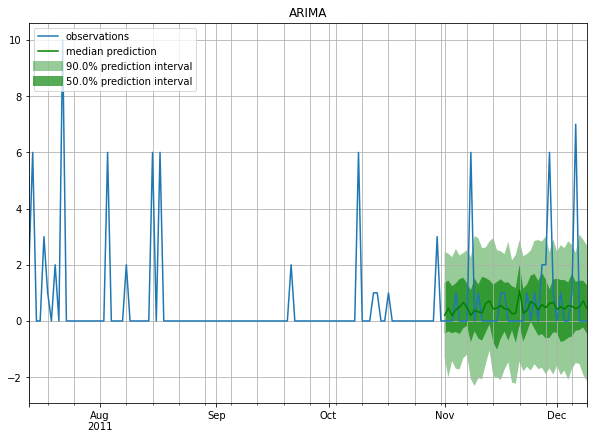

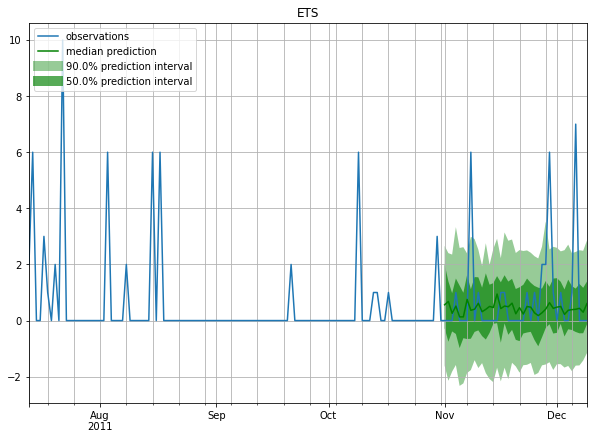

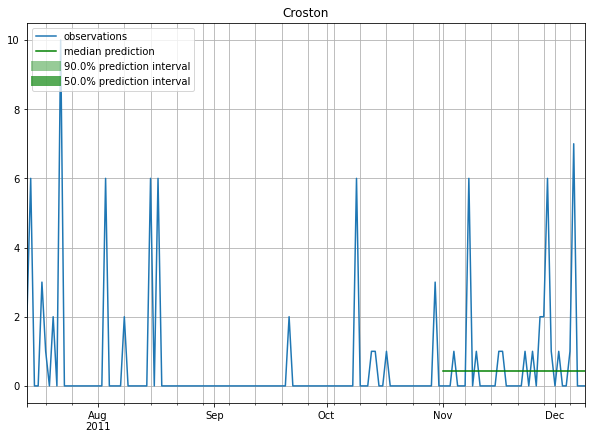

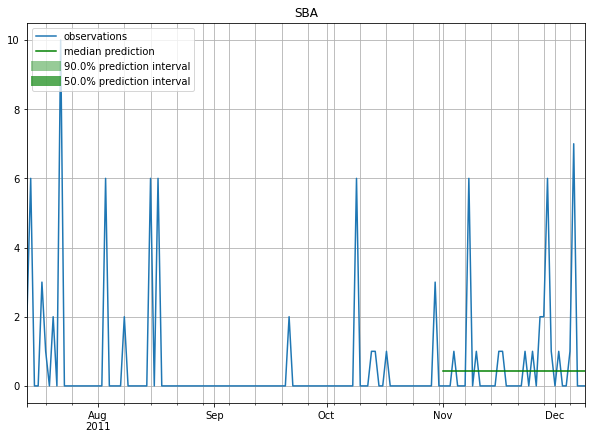

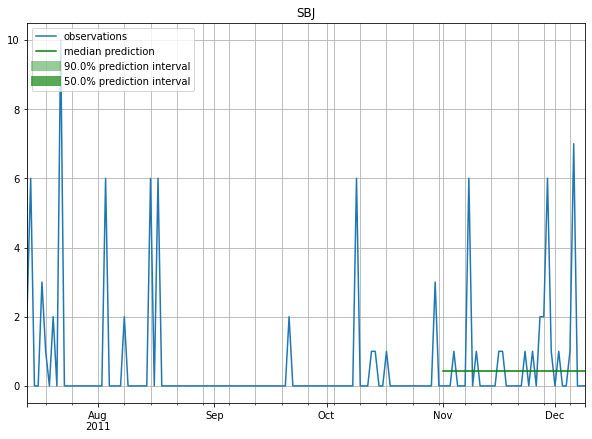

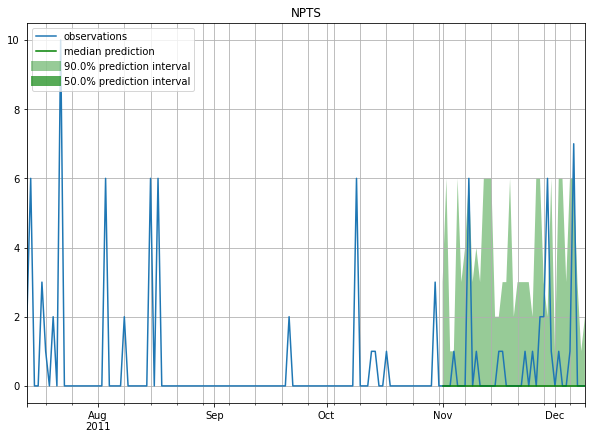

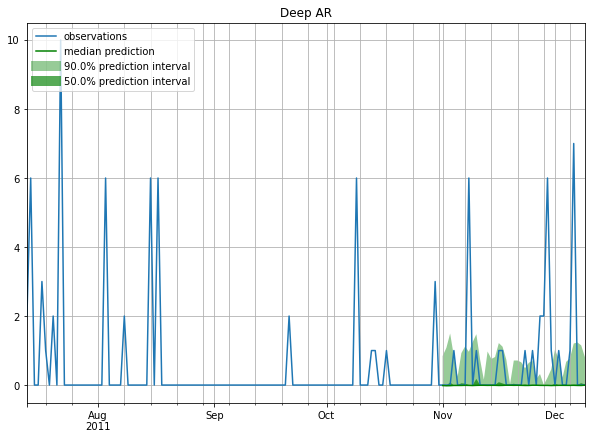

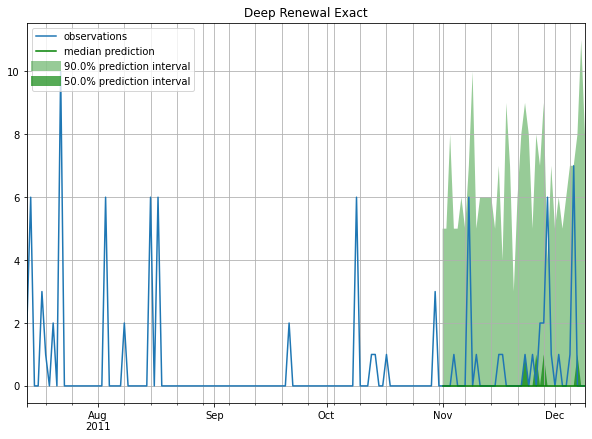

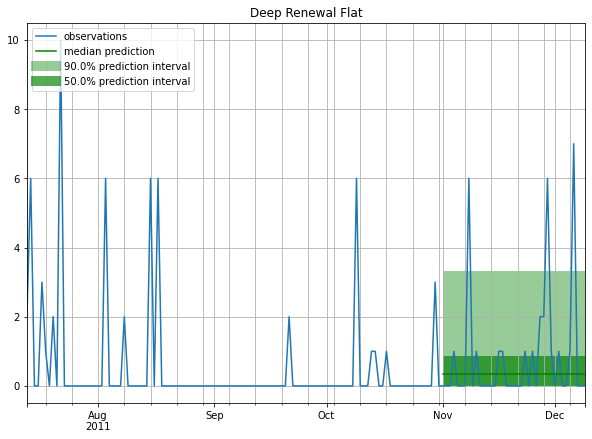

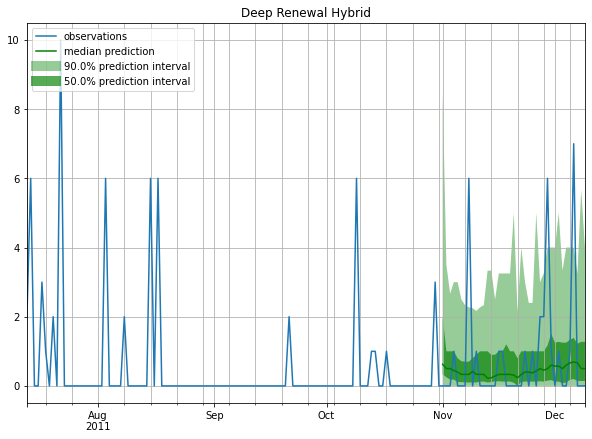

In [85]:
idx = 56
forecasts = [arima_forecast, ets_forecast, croston_forecast, sba_forecast, sbj_forecast, npts_forecast, deep_ar_forecasts, deep_renewal_exact_forecasts, deep_renewal_flat_forecasts, deep_renewal_hybrid_forecasts]
names = ["ARIMA","ETS","Croston","SBA","SBJ","NPTS","Deep AR","Deep Renewal Exact","Deep Renewal Flat","Deep Renewal Hybrid"]

for forecast, name in zip(forecasts, names):
    plot_prob_forecasts(tss[idx], forecast[idx],name)

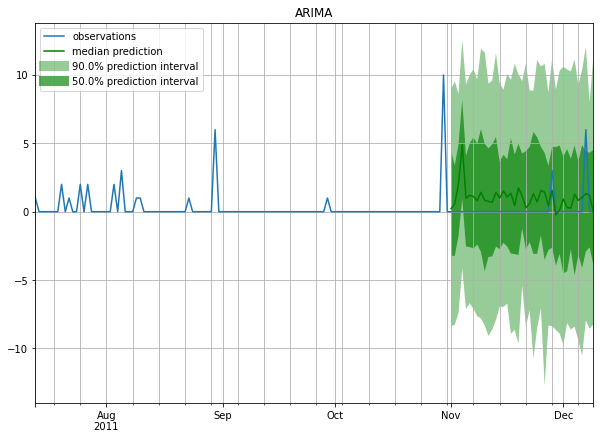

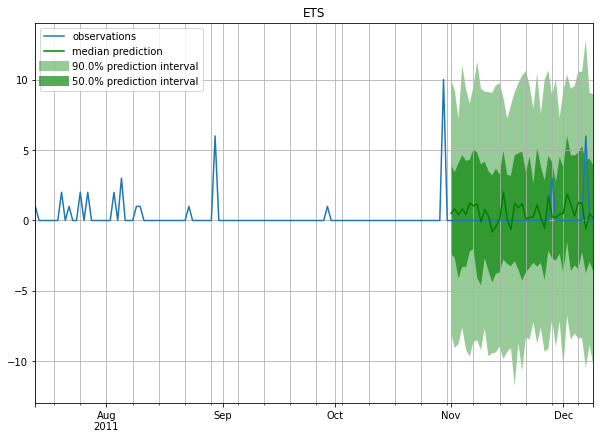

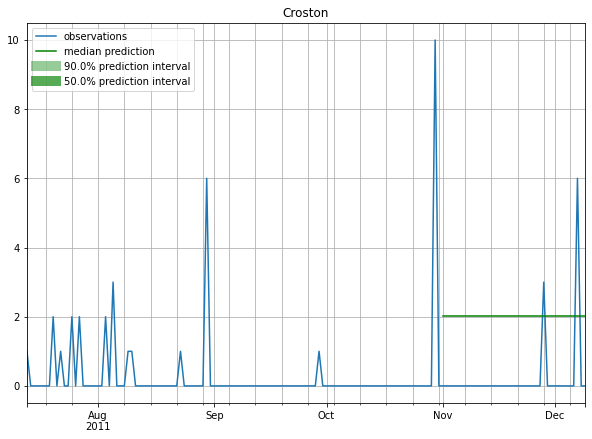

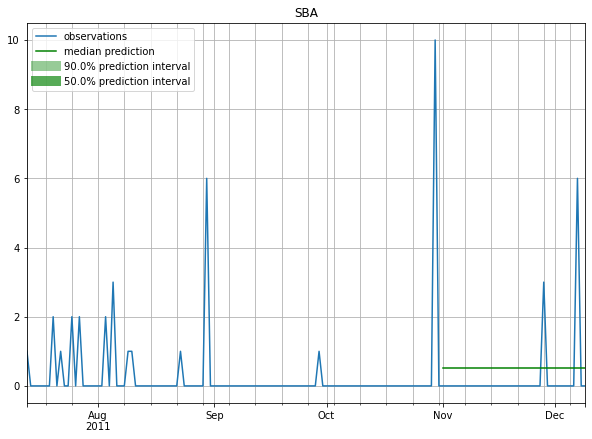

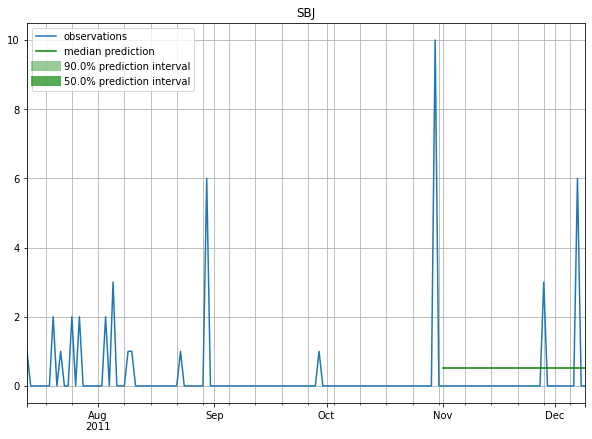

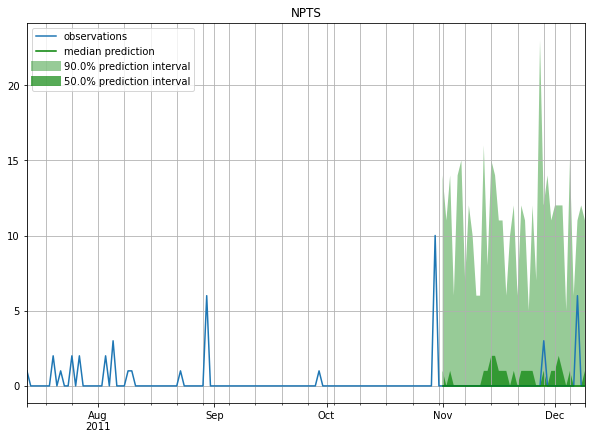

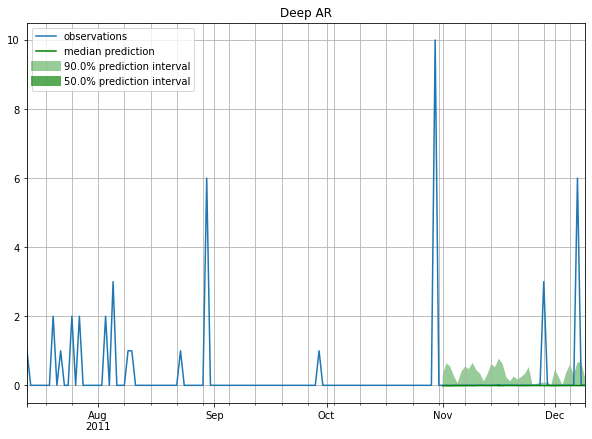

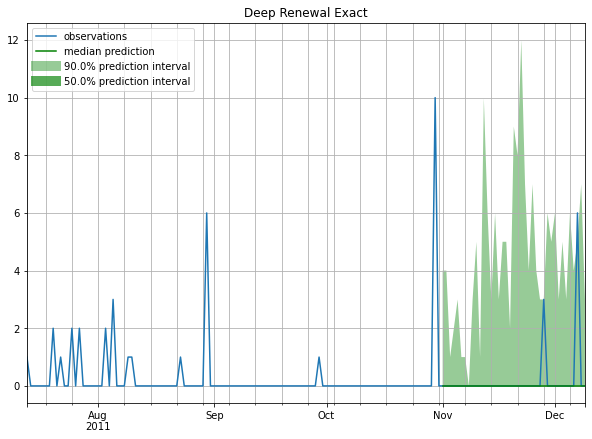

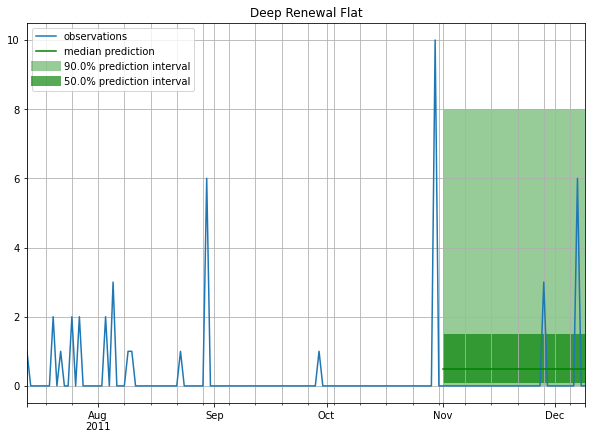

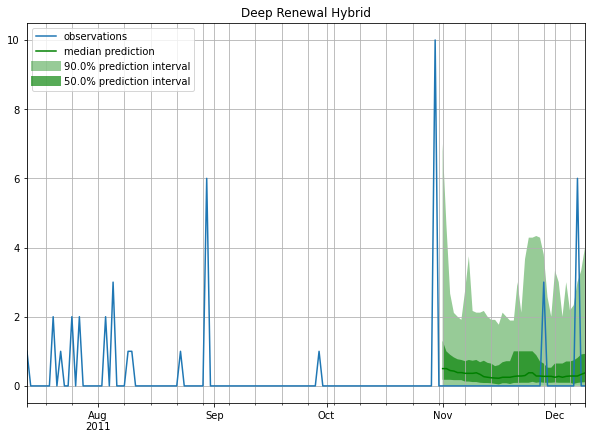

In [80]:
idx = 245
forecasts = [arima_forecast, ets_forecast, croston_forecast, sba_forecast, sbj_forecast, npts_forecast, deep_ar_forecasts, deep_renewal_exact_forecasts, deep_renewal_flat_forecasts, deep_renewal_hybrid_forecasts]
names = ["ARIMA","ETS","Croston","SBA","SBJ","NPTS","Deep AR","Deep Renewal Exact","Deep Renewal Flat","Deep Renewal Hybrid"]

for forecast, name in zip(forecasts, names):
    plot_prob_forecasts(tss[idx], forecast[idx],name)

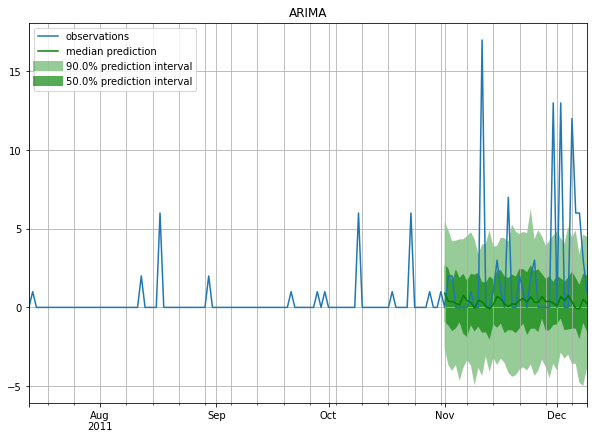

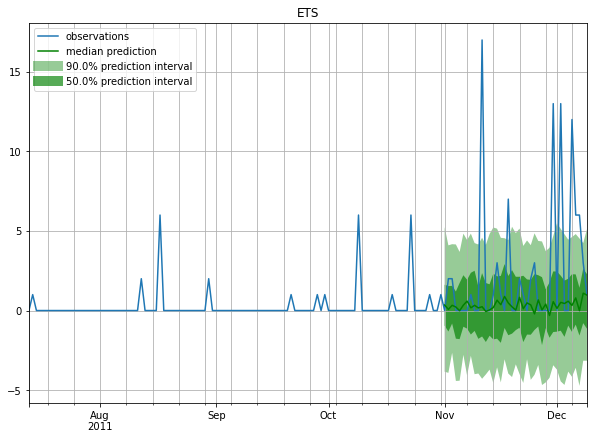

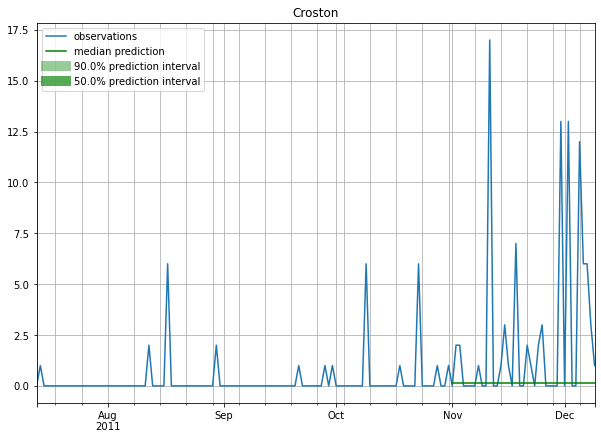

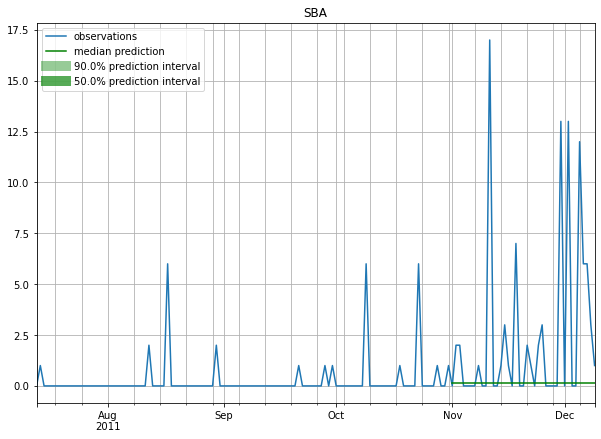

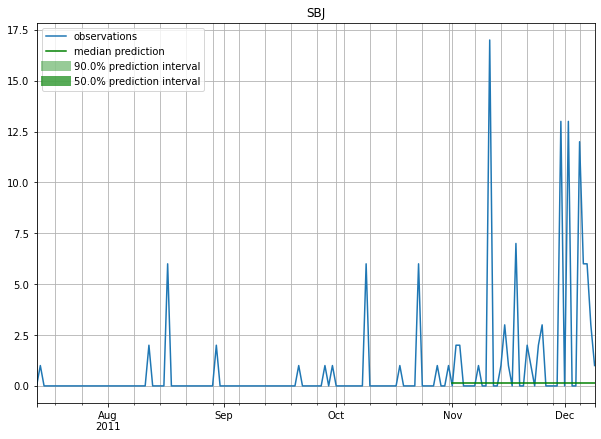

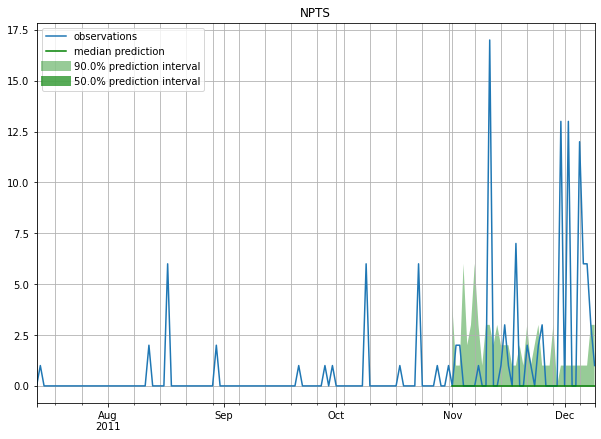

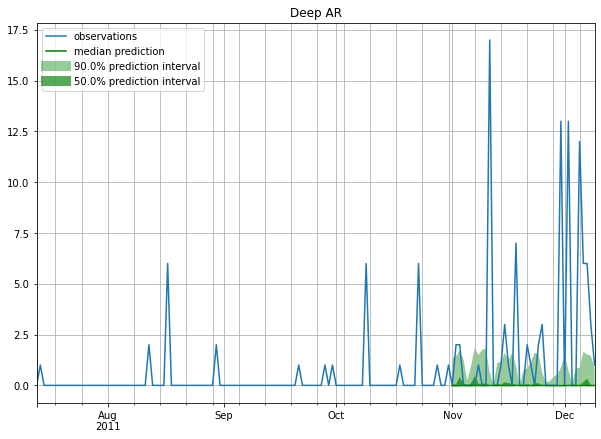

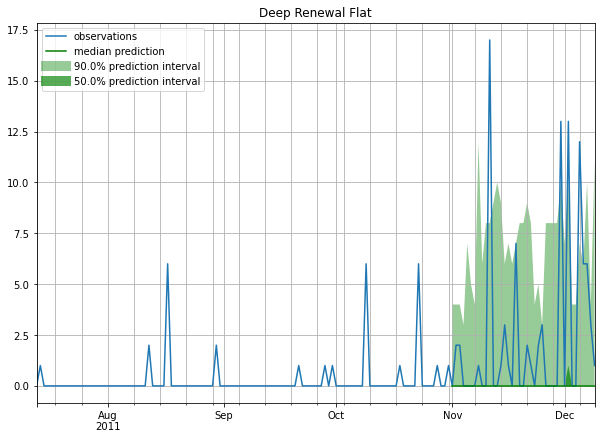

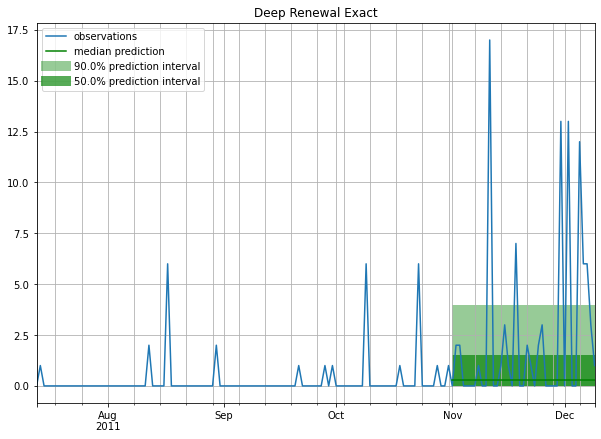

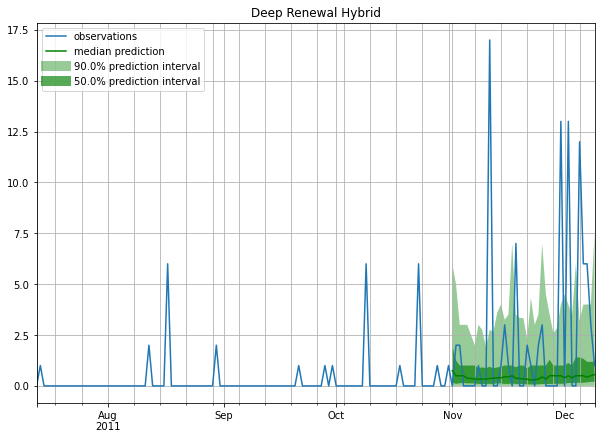

In [81]:
idx = 325
forecasts = [arima_forecast, ets_forecast, croston_forecast, sba_forecast, sbj_forecast, npts_forecast, deep_ar_forecasts, deep_renewal_exact_forecasts, deep_renewal_flat_forecasts, deep_renewal_hybrid_forecasts]
names = ["ARIMA","ETS","Croston","SBA","SBJ","NPTS","Deep AR","Deep Renewal Flat","Deep Renewal Exact","Deep Renewal Hybrid"]

for forecast, name in zip(forecasts, names):
    plot_prob_forecasts(tss[idx], forecast[idx],name)

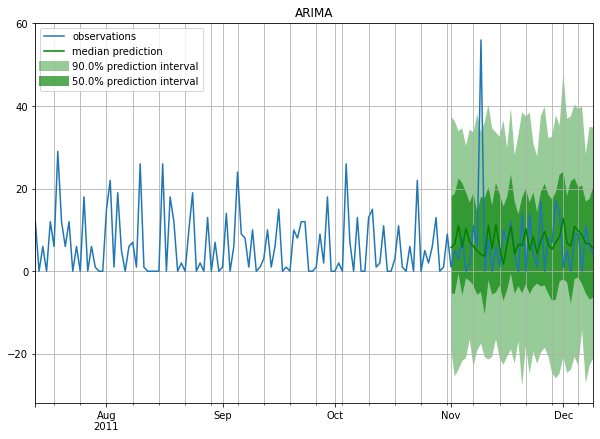

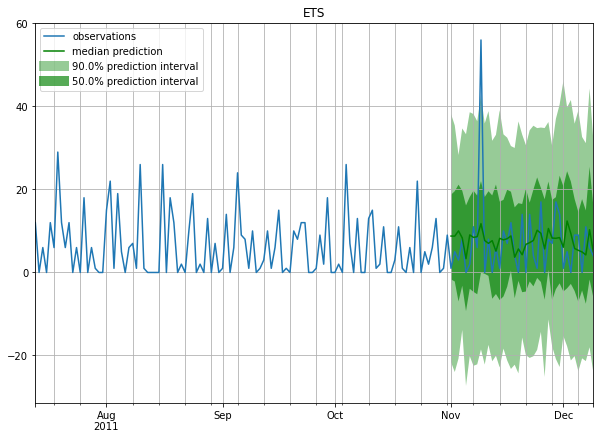

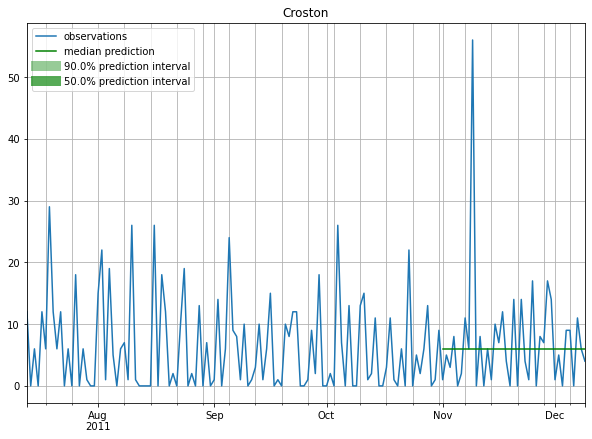

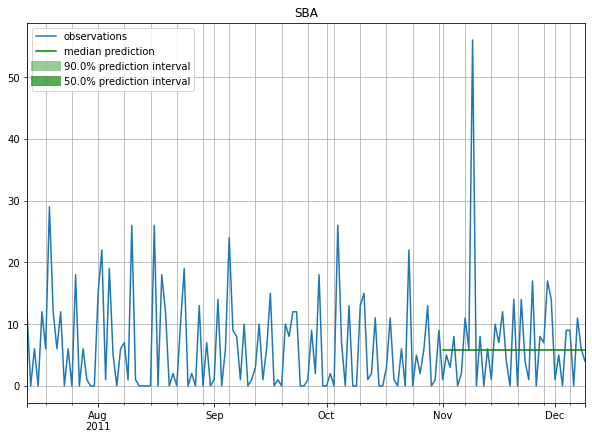

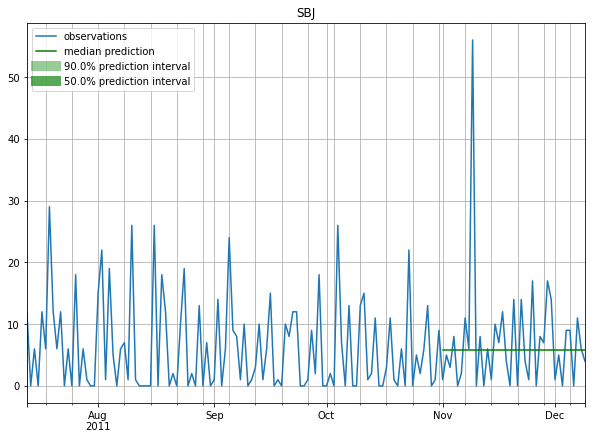

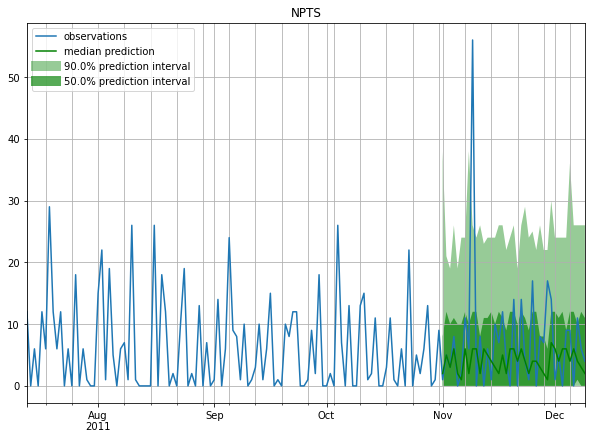

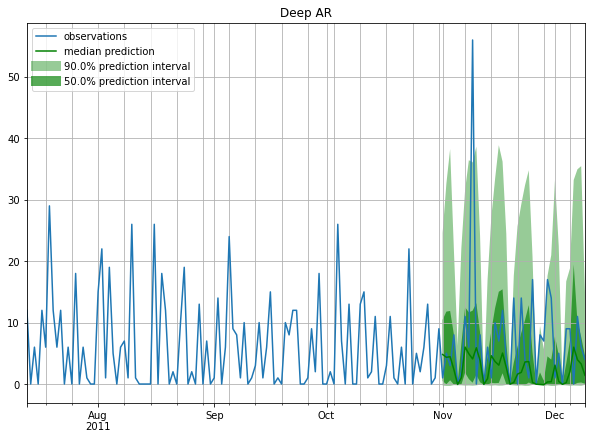

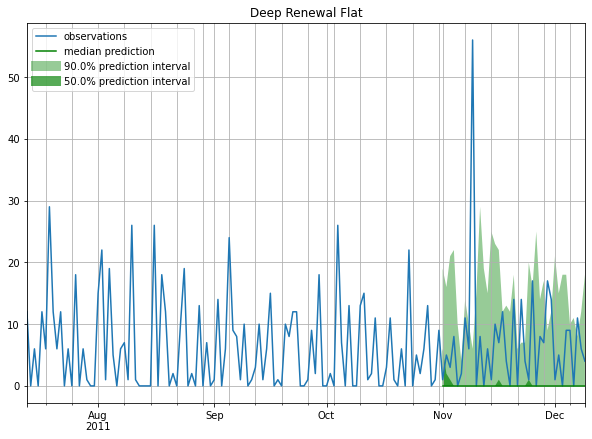

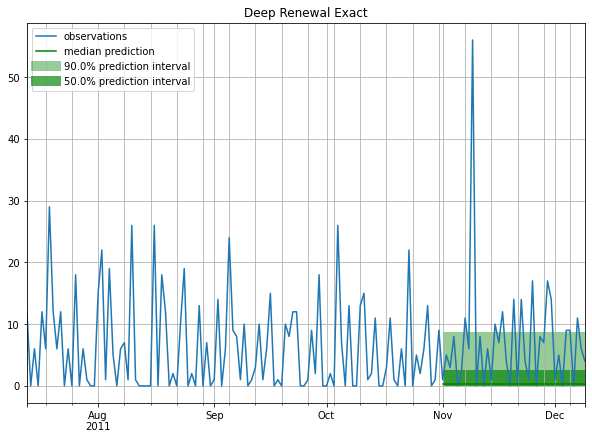

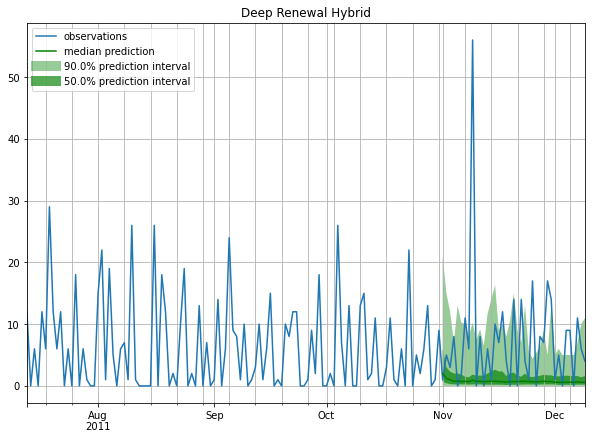

In [82]:
idx = 145
forecasts = [arima_forecast, ets_forecast, croston_forecast, sba_forecast, sbj_forecast, npts_forecast, deep_ar_forecasts, deep_renewal_exact_forecasts, deep_renewal_flat_forecasts, deep_renewal_hybrid_forecasts]
names = ["ARIMA","ETS","Croston","SBA","SBJ","NPTS","Deep AR","Deep Renewal Flat","Deep Renewal Exact","Deep Renewal Hybrid"]

for forecast, name in zip(forecasts, names):
    plot_prob_forecasts(tss[idx], forecast[idx],name)